### Agent-Lab: Vision Document Agent

Objective of this notebook is evaluating and adapting the implementation of [Multi-modal Agent](https://python.langchain.com/docs/integrations/llms/ollama/#multi-modal) specialized on documents.

---

In [1]:
%%capture
import json
import os
import nest_asyncio
from IPython.display import Image, Markdown, display
from dotenv import load_dotenv
from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

os.chdir("..")
load_dotenv()
nest_asyncio.apply()

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

# get checkpointer instance
graph_persistence_factory = container.graph_persistence_factory()
checkpointer = graph_persistence_factory.build_checkpoint_saver()

---
### Upload Document:


**Image:**

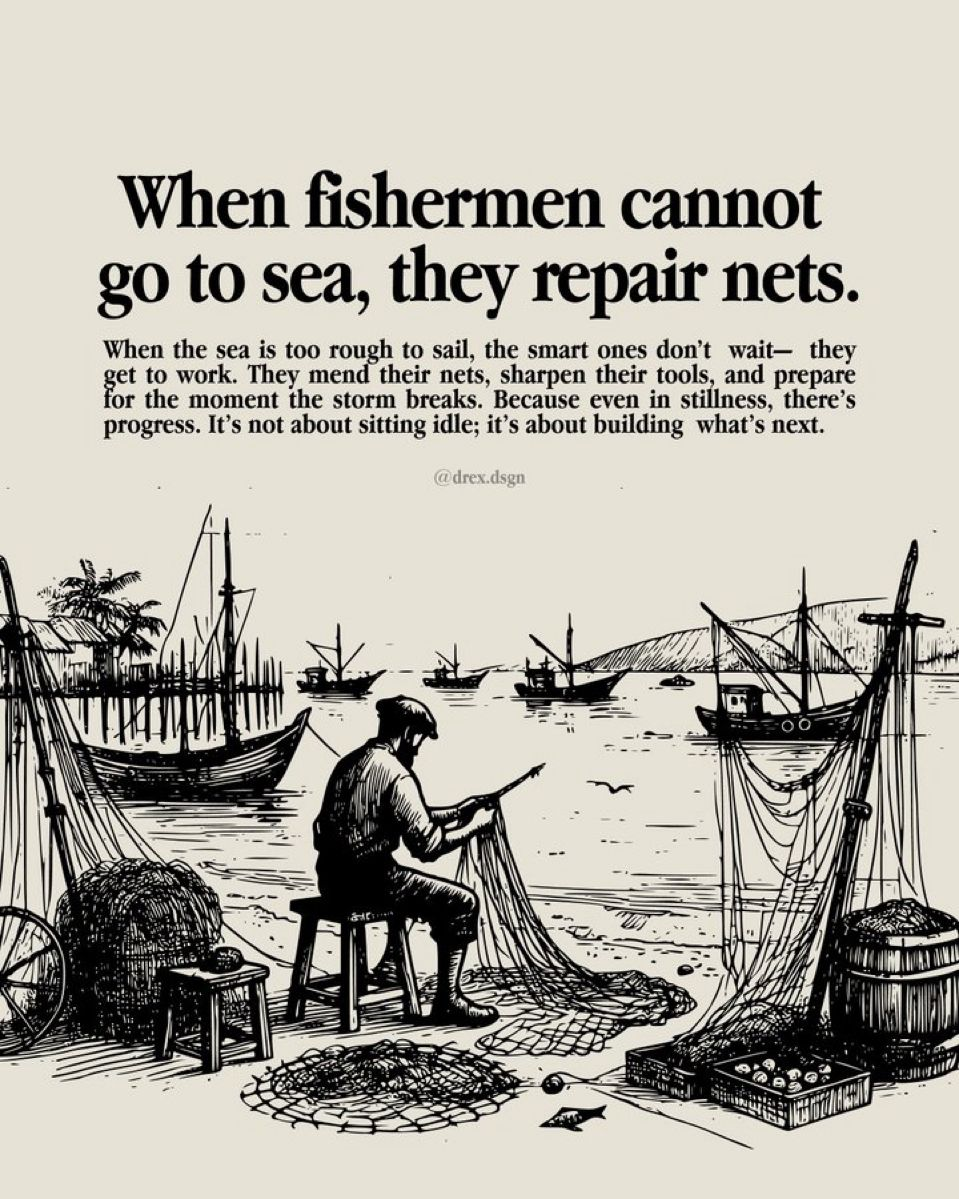

In [2]:
# create attachment
attachment_id = experiment_utils.create_attachment(
    file_path="tests/integration/vision_document_01.jpg", content_type="image/jpeg"
)
display(Markdown(f"**Image:**"))
display(Image(filename="tests/integration/vision_document_01.jpg"))

---
### XAI Grok Vision Document Agent

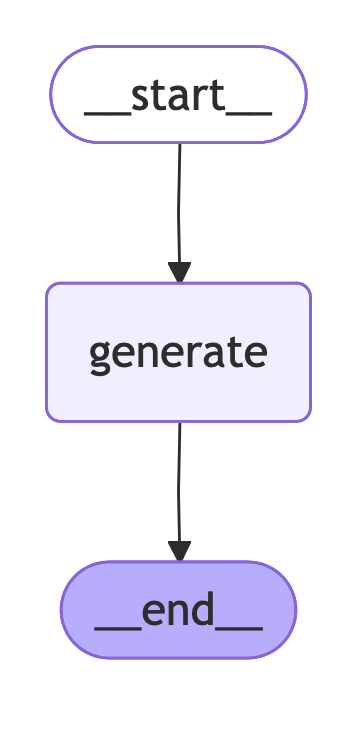

In [5]:
# Create Workflow
xai_agent = experiment_utils.create_xai_agent(
    agent_type="vision_document", llm_tag="grok-4-latest", api_key=os.getenv("XAI_API_KEY")
)
xai_vision_document_agent = container.vision_document_agent()
xai_workflow_builder = xai_vision_document_agent.get_workflow_builder(xai_agent["id"])
xai_workflow = xai_workflow_builder.compile(checkpointer=checkpointer)

experiment_utils.print_graph(xai_workflow)

In [6]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="You are studying this material, please generate a comprehensive overview, explain with details. Make sure your analysis does not overlook details.",
    agent_id=xai_agent["id"],
    attachment_id=attachment_id,
)

inputs = xai_vision_document_agent.get_input_params(message, schema="public")
config = xai_vision_document_agent.get_config(xai_agent["id"])
result = xai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = xai_vision_document_agent.format_response(result)

In [7]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

### Comprehensive Overview and Detailed Analysis of the Document Page

#### Main Topic and Purpose
This page appears to be an inspirational or motivational excerpt from a document, likely a presentation slide, blog post, or self-improvement article, emphasizing resilience, productivity, and proactive preparation during periods of setback or inactivity. It employs a metaphorical analogy of fishermen repairing their nets when unable to sail, symbolizing how individuals should use downtime wisely to build skills, tools, or strategies for future success. The core message promotes a mindset of turning obstacles into opportunities for progress, rather than idling. This could fit into broader themes of personal development, entrepreneurship, or agile work practices, encouraging readers to "build what's next" instead of waiting for ideal conditions. The page's design, with its illustrative artwork and concise text, suggests it's intended to be visually engaging and memorable, possibly from a source like a productivity blog (credited to "dev.to/dave"), aiming to inspire action in professional or creative contexts.

#### Accurate Transcription of Visible Text
The page contains the following text, presented in a clean, sans-serif font with a beige or parchment-like background for a rustic, timeless feel:

- **Title (in large, bold letters):** "When Fishermen cannot go to sea, they repair nets."
- **Body Text:** "When the sea is too rough to sail, the smart ones don't wait - they get to work. They mend their nets, sharpen their tools, and prepare for the next run. They use their time wisely. Because they know: setbacks are just setups for comebacks. Progress. It's not about sitting idle; it's about building what's next."
- **Citation (in small print at the bottom of the text):** "(c) dev.to/dave"

There are no additional textual elements like footnotes, page numbers, or headers visible in the image. The text is centered and aligned for emphasis, with the title dominating the top half and the explanatory paragraph below it.

#### Detailed Description of Visual Elements
The page features a prominent black-and-white illustration in a vintage, hand-drawn style reminiscent of 19th-century engravings or nautical artwork, occupying the lower half of the page. This visual complements the text's metaphor and adds emotional depth:

- **Central Figure:** A fisherman, depicted as a rugged, bearded man wearing traditional attire (e.g., a hat, rolled-up sleeves, and boots), is seated on a small wooden stool. He is actively repairing or mending a large fishing net spread out on the ground in front of him. He holds a tool (possibly a needle or hook) in one hand and a section of the net in the other, with a focused expression suggesting diligence and purpose.
- **Surrounding Elements:** At his feet and around him are various fishing-related items, including a coiled rope, a barrel (possibly for storage or as a makeshift table), and scattered tools or net fragments. The ground appears to be a dock or shoreline, with subtle details like wooden planks and debris.
- **Background Scene:** In the distance, a seascape shows several sailing ships and boats on choppy waters, with masts and sails visible. The sea looks somewhat turbulent, aligning with the text's mention of "rough" conditions. There are hints of waves, distant horizons, and possibly other figures or boats, evoking a busy harbor or coastal village. No modern elements are present, reinforcing a timeless, proverbial quality.
- **Overall Composition:** The illustration is framed below the text, creating a narrative flow from the abstract advice to a concrete visual example. The style is illustrative rather than photorealistic, with cross-hatching for shading and texture, which adds a sense of authenticity and relatability. There are no colors; it's entirely in grayscale, which may symbolize simplicity and focus.

This visual is not merely decorative—it directly illustrates the metaphor, making the abstract concept of "repairing nets" tangible and reinforcing the idea of productive waiting.

#### Synthesis and Interpretation: Key Insights and Explanations
Drawing from the text and visuals, this page synthesizes a powerful life or work philosophy rooted in proactivity and resilience. Let's break it down in detail, ensuring no elements are overlooked, as if studying this material for deeper understanding:

- **Core Metaphor Explained:** The fisherman analogy is drawn from real-world practices in coastal communities, where weather-dependent livelihoods (like fishing) often face unpredictable disruptions. When seas are "too rough to sail," fishermen don't passively wait; they engage in maintenance tasks like mending nets (repairing damaged fishing gear), sharpening tools (e.g., knives or hooks for efficiency), and preparing for the "next run" (future fishing expeditions). This is not just practical—it's strategic, ensuring that when conditions improve, they are better equipped to succeed. The text explicitly contrasts "smart ones" who act versus those who "wait," implying intelligence in resourcefulness.

- **Key Themes and Insights:**
  - **Productivity in Downtime:** The phrase "they use their time wisely" highlights a mindset shift from idleness to intentional action. In a broader context, this could apply to modern scenarios like career breaks, project delays, or economic downturns. For instance, during a job loss or slow business period, one might "repair nets" by upskilling (e.g., taking online courses), networking, or refining resumes—turning enforced pauses into growth opportunities.
  - **Resilience and Perspective on Setbacks:** The line "setbacks are just setups for comebacks" is a pivotal insight, reframing challenges as temporary and preparatory. This echoes stoic philosophy (e.g., Marcus Aurelius on obstacles as opportunities) or modern motivational concepts from authors like James Clear (Atomic Habits) or Carol Dweck (growth mindset). It's a reminder that progress isn't linear; it's iterative, built through preparation.
  - **Action-Oriented Conclusion:** "Progress. It's not about sitting idle; it's about building what's next" serves as a call to action, emphasizing forward momentum. The fragmented sentence structure ("Progress.") adds emphasis, making it punchy and quotable, ideal for social media or motivational posters.

- **Broader Connections and Applications:** As this seems to be a standalone page (no prior context provided), it could initiate a document on personal productivity or agile methodologies (e.g., in software development, where "dev.to" is a tech blogging platform). If part of a series, it might lead into topics like habit formation or innovation during crises. For studying purposes, consider real-world examples: In business, companies like Netflix pivoted during the 2008 recession by "repairing nets" (investing in streaming tech). Personally, it advises against procrastination—e.g., using a rainy day (literal or figurative) to organize one's workspace or learn a new skill.

- **Potential Symbolism and Subtleties:** The illustration's vintage style evokes timeless wisdom, suggesting the advice is universal across eras. The fisherman's solitary focus might symbolize individual agency, while the distant boats imply community or shared challenges. The citation "(c) dev.to/dave" points to an original source on Dev.to (a developer community site), possibly from a blog post by user "dave," which could tie into tech-related productivity (e.g., debugging code during downtime). No details are overlooked here—the image's composition directs the eye from the fisherman (action) to the sea (future opportunity), mirroring the text's progression.

#### Relevance for RAG and Knowledge Base
This summary captures the page's essence in a detailed, query-friendly format, enabling retrieval for topics like "motivational analogies for productivity," "handling setbacks," or "fisherman metaphors in self-help." It's self-contained yet expandable—if future pages build on this, references could connect (e.g., "Extending the fisherman analogy from the prior page..."). For studying, this analysis provides a comprehensive breakdown, encouraging application in daily life: Next time you're "stuck," ask, "What nets can I repair?" This fosters a proactive, resilient approach to challenges.

---
### OpenAI Vision Document Agent

In [9]:
# Create Workflow
openai_agent = experiment_utils.create_openai_agent(
    agent_type="vision_document", llm_tag="gpt-5-nano", api_key=os.getenv("OPENAI_API_KEY")
)
openai_vision_document_agent = container.vision_document_agent()
openai_workflow_builder = openai_vision_document_agent.get_workflow_builder(openai_agent["id"])
openai_workflow = openai_workflow_builder.compile(checkpointer=checkpointer)

In [10]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="You are studying this material, please generate a comprehensive overview, explain with details. Make sure your analysis does not overlook details.",
    agent_id=openai_agent["id"],
    attachment_id=attachment_id,
)

inputs = openai_vision_document_agent.get_input_params(message, schema="public")
config = openai_vision_document_agent.get_config(openai_agent["id"])
result = openai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = openai_vision_document_agent.format_response(result)

In [11]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Comprehensive overview of the page

Main topic
- A motivational message about resilience and proactive preparation during downtime. The core idea is that when external conditions prevent progress (sea too rough, cannot go fishing), skilled people use the time to repair, practice, and prepare for what’s next—demonstrating that stillness can drive future progress.

Text transcription (visible content)
- Heading: When fishermen cannot go to sea, they repair nets.
- Body text:
  When the sea is too rough to sail, the smart ones don’t wait— they get to work. They mend their nets, sharpen their tools, and prepare for the moment the storm breaks. Because even in stillness, there’s progress. It’s not about sitting idle; it’s about building what’s next.
- Credit/handle (faint): @drex.dsgn

Visual description and composition
- Scene: A black-and-white line drawing of a coastal fishing harbor. In the foreground, a fisherman sits on a small stool, actively mending a large fishing net. Nets are spread on the ground around him, with a second net partly draped over his lap.
- Environment: Several boats anchored in the calm water beyond, with masts and rigging visible. A distant shoreline with low hills or mountains, and some palm trees or coastal vegetation on the left. A crate of fish, a barrel, and other fishing gear are scattered around, reinforcing the working harbor setting.
- Style: Old-fashioned, sketch-like illustration with high-contrast black ink on a light beige background. The overall aesthetic resembles a vintage or artisanal engraving, emphasizing craft and labor.
- Text treatment: Bold, large-display typography at the top dominates the page, followed by a dense, readable paragraph in a serif font. The contrast between the bold headline and the more compact body text creates a strong visual hierarchy.

Key concepts and insights
- Proactive maintenance: The page equates downtime with an opportunity to repair, sharpen, and prepare—skills that sustain progress when external conditions improve.
- Skill and readiness: The emphasis on mending nets and sharpening tools highlights the importance of maintaining core competencies so one is ready to capitalize on the next opportunity.
- Momentum in stillness: The text asserts that progress can occur even when overt activity isn’t visible, reframing stillness as productive rather than idle.
- Metaphor extension: “Building what’s next” suggests a forward-looking mindset—investing in infrastructure, tools, and preparation to enable future success.

Potential implications for RAG-aware use
- Information extraction: This page provides a compact, high-utility metaphor that can be linked to topics such as resilience, productivity, time management, and entrepreneurial mindset.
- Knowledge graph nodes:
  - Theme: Proactive preparation during downtime
  - Actions: mend nets, sharpen tools, prepare, plan for storm breaks
  - Outcome: progress in stillness; readiness for future opportunities
  - Metaphor mapping: downtime -> skill maintenance -> future readiness
- Complementary queries for retrieval:
  - "Quotes about proactive work during downtime"
  - "Metaphors linking resilience and preparation"
  - "Examples of maintaining skills when operations pause"

Alt-text (for accessibility)
- A black-and-white illustration of a fisherman mending nets on a beach, with boats in the harbor and fishing gear scattered around. Bold text at the top reads, “When fishermen cannot go to sea, they repair nets,” followed by a descriptive paragraph about using downtime to prepare for the storm.

Contextual and usage notes
- The image blends a practical scene with an inspirational message, suitable for slides or posters in contexts like productivity training, leadership development, or business resilience discussions.
- The watermark “@drex.dsgn” indicates a possible creator or designer attribution.

If you’d like, I can tailor a short, query-friendly summary (one to two sentences) or generate a few variant captions that preserve the same message for different audiences (e.g., corporate, educational, or personal development).

---
### Anthropic Vision Document Agent

In [12]:
# Create Workflow
anthropic_agent = experiment_utils.create_anthropic_agent(
    agent_type="vision_document", llm_tag="claude-3-5-haiku-latest", api_key=os.getenv("ANTHROPIC_API_KEY")
)
anthropic_vision_document_agent = container.vision_document_agent()
anthropic_workflow_builder = anthropic_vision_document_agent.get_workflow_builder(anthropic_agent["id"])
anthropic_workflow = anthropic_workflow_builder.compile(checkpointer=checkpointer)

In [13]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="You are studying this material, please generate a comprehensive overview, explain with details. Make sure your analysis does not overlook details.",
    agent_id=anthropic_agent["id"],
    attachment_id=attachment_id,
)

inputs = anthropic_vision_document_agent.get_input_params(message, schema="public")
config = anthropic_vision_document_agent.get_config(anthropic_agent["id"])
result = anthropic_workflow.invoke(inputs, config)
ai_message_content, workflow_state = anthropic_vision_document_agent.format_response(result)

In [14]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Comprehensive Overview: Productivity and Resilience in Challenging Conditions

Main Theme:
The image illustrates a profound metaphor about proactive behavior, productivity, and personal growth during challenging or restrictive circumstances, using fishermen as a powerful symbolic representation.

Textual Analysis:
The central quote, "When fishermen cannot go to sea, they repair nets," encapsulates a fundamental life philosophy of making constructive use of unproductive periods. The accompanying text elaborates on this concept, emphasizing that intelligent individuals don't passively wait during obstacles but actively prepare for future opportunities.

Key Insights:
1. Proactive Preparation
- During unfavorable conditions (rough seas), fishermen engage in meaningful work
- They mend fishing nets, sharpen tools, and strategically prepare for future expeditions
- The underlying message: Continuous improvement is possible even during seemingly unproductive moments

2. Philosophical Interpretation
- "Even in stillness, there's progress"
- Success is not about constant motion, but strategic preparation
- Transforming limitations into opportunities for growth and development

Visual Representation:
The black and white illustration depicts a fisherman sitting on a stool, meticulously repairing fishing nets. The background shows multiple boats in a harbor, with palm trees and a serene maritime landscape, reinforcing the narrative of resilience and purposeful action.

Symbolic Elements:
- Fishing nets: Represent tools and skills
- Seated fisherman: Embodies focused, deliberate work
- Stationary boats: Symbolize temporary pause, not permanent stoppage

Broader Applicability:
While specifically about fishermen, the metaphor extends to professional and personal development across various domains:
- Embracing downtime for skill enhancement
- Maintaining a forward-looking perspective
- Converting constraints into opportunities for improvement

Contextual Credit:
The image is attributed to @drex.dsgn, suggesting it's part of a motivational or philosophical design series.

---
### Ollama Vision Document Agent

In [15]:
# Create Workflow
ollama_agent = experiment_utils.create_ollama_agent(
    agent_type="vision_document", llm_tag="gemma3", ollama_endpoint=os.getenv("OLLAMA_ENDPOINT")
)
ollama_vision_document_agent = container.vision_document_agent()
ollama_workflow_builder = ollama_vision_document_agent.get_workflow_builder(ollama_agent["id"])
ollama_workflow = ollama_workflow_builder.compile(checkpointer=checkpointer)

In [16]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="You are studying this material, please generate a comprehensive overview, explain with details. Make sure your analysis does not overlook details.",
    agent_id=ollama_agent["id"],
    attachment_id=attachment_id,
)

inputs = ollama_vision_document_agent.get_input_params(message, schema="public")
config = ollama_vision_document_agent.get_config(ollama_agent["id"])
result = ollama_workflow.invoke(inputs, config)
ai_message_content, workflow_state = ollama_vision_document_agent.format_response(result)

In [17]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Okay, here’s a comprehensive overview of the image, incorporating details and addressing the prompt’s request for a thorough analysis:

**Overall Theme & Purpose:**

The image conveys a vital lesson about preparedness and proactive action, particularly relevant to seafaring and fishing. It emphasizes the importance of addressing potential issues *before* they escalate, rather than passively waiting for calmer conditions. The core message is that diligence and maintenance are paramount when facing demanding circumstances.

**Detailed Description of the Image:**

*   **Central Figure:** A weathered fisherman is the focal point. He’s seated at a wooden table, intensely focused on repairing a fishing net. He appears older and experienced, suggesting a lifetime of seafaring work. His posture and expression convey seriousness and skill.
*   **The Net:** The net itself is the primary object of repair. It's a complex, woven structure, typical of fishing nets. It's heavily knotted and shows signs of wear and tear. The repair work involves meticulously mending the damaged sections, highlighting the skill and patience required.
*   **The Workspace:** The table is a simple, sturdy wooden affair. Scattered around are tools likely used for net repair – small knives, scissors, and perhaps weights to help hold sections in place.  The table is likely a makeshift workstation, indicating a pragmatic approach.
*   **Background:** In the background, we see a small fishing boat (likely a rowboat) and another boat in the distance. The presence of the boats suggests the fisherman’s profession and implies he's preparing for a return to the sea. The water is choppy, and the sky is overcast - reinforcing the impression of a challenging environment.

**Interpretation & Implications:**

*   **Proactive Maintenance:** The core message is about preventing problems before they occur.  Waiting for calm seas (as the text suggests) is a dangerous strategy for a fisherman.  Repairing the nets *before* heading out to sea demonstrates foresight and a commitment to safety.
*   **Respect for the Sea:** The image subtly communicates respect for the power and unpredictability of the sea. It's a reminder that one cannot control the environment but can prepare for it.
*   **Skill and Craftsmanship:** The detail of the repair work highlights the skills and craftsmanship required in the profession. It’s not simply about catching fish; it’s about maintaining the tools that make that possible.

**Connection to RAG Context (Hypothetical):**

If this were a page in a larger document, this page would likely introduce a theme of preparedness, resourcefulness, and the practical wisdom needed for a life at sea. Subsequent pages might then elaborate on navigation, weather forecasting, or the specific techniques used for repairing nets.